<a href="https://colab.research.google.com/github/Norberto27/-IAAA2-DISTANCIA-A/blob/main/NRMU_FINAL__AA2_TP2_MLP_KAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 AA2 MLP vs KAN

#**NORBERTO MARTEARENA URQUIZA**

Tema: **Comparación entre MLP (Perceptrón Multicapa) y KAN (Kolmogorov-Arnold Networks) en problemas de regresión**

* Utilice este notebook como su diario de aprendizaje en esta materia.
* Mencione las herramientas utilizadas.
* Describa sus dificultades y como pudo sortearlas.
* Grafique las curvas de entrenamiento y testeo para cada configuración probada en sus modelos.


## **Objetivos:**  
1. Generar un conjunto de datos sintéticos para un problema de regresión.  
2. Implementar y evaluar una **MLP de una capa oculta** en diferentes configuraciones.  
3. Implementar y evaluar una **red KAN** en diferentes configuraciones.  
4. Analizar los casos de **underfitting**, **sobreajuste (overfitting)** y una **solución aceptable** en ambos modelos.  




## **Instrucciones Detalladas:**  

### **1. Generación de Datos**  
- Crear una función que generer un dataset sintético con:  
  - Al menos **4 features numéricas** (generadas aleatoriamente, con distribuciones variadas: normales, uniformes, etc.).  
  - **1 target continuo** (generado mediante una combinación **no** lineal de las features + ruido gaussiano).  
  - Ejemplo:  
    ```python
    import numpy as np
    np.random.seed(42)
    X = np.random.randn(1000, 4)  # 1000 muestras, 4 features
    y = 2 * X[:, 0] + np.sin(X[:, 1]) + X[:, 2] * X[:, 3] + 0.1 * np.random.randn(1000)
    ```  
  - **Dividir los datos** en entrenamiento (70%) y test (30%).  


#**🟩 Bloque 1 – Importación de librerías y configuración inicial**


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

#**🟨 Bloque 2 – Generación de datos sintéticos para regresión**

In [3]:
# prompt: Crear una función que generer un dataset sintético con:
# Al menos 4 features numéricas (generadas aleatoriamente, con distribuciones variadas: normales, uniformes, etc.).
# 1 target continuo (generado mediante una combinación no lineal de las features + ruido gaussiano).
# Dividir los datos en entrenamiento (70%) y test (30%



def generate_synthetic_data(n_samples=1000, random_state=42):
  """
  Genera un dataset sintético para un problema de regresión.

  Args:
    n_samples: Número de muestras a generar.
    random_state: Semilla para la generación de números aleatorios.

  Returns:
    X_train, X_test, y_train, y_test: Datos divididos en entrenamiento y test.
  """
  np.random.seed(random_state)

  # Generar features con distribuciones variadas
  X1 = np.random.randn(n_samples)  # Distribución normal
  X2 = np.random.uniform(-5, 5, n_samples) # Distribución uniforme
  X3 = np.random.normal(loc=10, scale=2, size=n_samples) # Distribución normal con media y desviación estándar específicas
  X4 = np.random.rand(n_samples) * 10 # Distribución uniforme (0 a 10)

  X = np.column_stack((X1, X2, X3, X4))

  # Generar target continuo con combinación no lineal y ruido
  y = 2 * X[:, 0] + np.sin(X[:, 1]) + np.sqrt(np.abs(X[:, 2])) * X[:, 3] + 0.5 * np.random.randn(n_samples)

  # Dividir los datos en entrenamiento y test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

  return X_train, X_test, y_train, y_test

# Ejemplo de uso:
X_train, X_test, y_train, y_test = generate_synthetic_data()

print("Dimensiones de los datos de entrenamiento:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nDimensiones de los datos de test:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Dimensiones de los datos de entrenamiento:
X_train shape: (700, 4)
y_train shape: (700,)

Dimensiones de los datos de test:
X_test shape: (300, 4)
y_test shape: (300,)


IMPRIMIR LAS 5 PRIMERAS OBSERVACIONES

In [4]:
# 🔍 Visualizamos las primeras 5 observaciones
print("X_train:", X_train[:5])
print("y_train:", y_train[:5])


X_train: [[-1.12970685 -1.61732494  9.2258006   2.75922694]
 [ 0.38406545 -0.50215351 12.83920601  3.74721971]
 [-1.60644632 -2.45329378  8.99164034  2.97287204]
 [-0.24896415  4.83678925  9.37388394  0.50622472]
 [-0.07443343  3.79581855  8.20930736  9.7094025 ]]
y_train: [ 5.22634698 12.78787209  4.57050788 -0.62373167 27.21556189]


#**🟦 Bloque 3 – Definición del modelo MLP**

In [5]:
# prompt: HACER LA CODIFICACION PARA REALIZAR EL Entrenamiento de una MLP (1 capa oculta), QUE LAS VARIABLES QUE SE UTILICEN EN LO POSIBLE ESTEN EN ESPAÑOL COMO ASI TAMBIEN TODAS LAS EXPLICACIONES
# UsarPyTorch/TensorFlow para implementar una MLP con:
# Función de activación ReLU (u otra no lineal).
# Optimizador: Adam o SGD.
# Métrica de evaluación: Error Cuadrático Medio (MSE).
# Configuraciones a probar:
# Underfitting:
# Pocas neuronas en la capa oculta (ej: 2 neuronas).
# Entrenar con muy pocas épocas (ej: 10).
# Mostrar gráficos de pérdida y comparar rendimiento en train/test.
# Solución Aceptable:
# Neuronas suficientes (ej: 20-50) y épocas adecuadas (ej: 100).
# Regularización L2 (weight decay) si es necesario.
# Overfitting:
# Demasiadas neuronas (ej: 200) o muchas épocas (ej: 1000).
# Sin regularización.
# Mostrar cómo el error en entrenamiento es mucho menor que en test.

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Convertir los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) # Añadir una dimensión para que sea compatible
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1) # Añadir una dimensión

# Definición de la MLP con una capa oculta
class MLP(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(MLP, self).__init__()
    self.capa_oculta = nn.Linear(input_size, hidden_size) # Capa lineal (totalmente conectada)
    self.relu = nn.ReLU() # Función de activación ReLU
    self.capa_salida = nn.Linear(hidden_size, output_size) # Capa de salida

  def forward(self, x):
    salida = self.capa_oculta(x)
    salida = self.relu(salida)
    salida = self.capa_salida(salida)
    return salida


#**🟧 Bloque 4 – Entrenamiento del modelo MLP**


###  Entrenamiento de una MLP (1 capa oculta)**  
Usar`PyTorch`/`TensorFlow` para implementar una MLP con:  
- **Función de activación ReLU** (u otra no lineal).  
- **Optimizador:** Adam o SGD.  
- **Métrica de evaluación:** Error Cuadrático Medio (MSE).  

**Configuraciones a probar:**  
1. **Underfitting:**  
   - Pocas neuronas en la capa oculta (ej: 2 neuronas).  
   - Entrenar con muy pocas épocas (ej: 10).  
   - Mostrar gráficos de pérdida y comparar rendimiento en train/test.  

2. **Solución Aceptable:**  
   - Neuronas suficientes (ej: 20-50) y épocas adecuadas (ej: 100).  
   - Regularización L2 (weight decay) si es necesario.  

3. **Overfitting:**  
   - Demasiadas neuronas (ej: 200) o muchas épocas (ej: 1000).  
   - Sin regularización.  
   - Mostrar cómo el error en entrenamiento es mucho menor que en test.  


In [6]:
# Función para entrenar la MLP
def entrenar_mlp(modelo, criterion, optimizer, X_train, y_train, X_test, y_test, num_epocas):
  historial_perdida_train = []
  historial_perdida_test = []

  for epoca in range(num_epocas):
    # Modo entrenamiento
    modelo.train()
    salidas = modelo(X_train)
    perdida_train = criterion(salidas, y_train)

    # Backpropagation y optimización
    optimizer.zero_grad() # Limpiar gradientes
    perdida_train.backward() # Calcular gradientes
    optimizer.step() # Actualizar pesos

    # Modo evaluación (sin calcular gradientes)
    modelo.eval()
    with torch.no_grad():
      salidas_test = modelo(X_test)
      perdida_test = criterion(salidas_test, y_test)

    historial_perdida_train.append(perdida_train.item())
    historial_perdida_test.append(perdida_test.item())

    if (epoca + 1) % 100 == 0 or epoca == 0 or epoca == num_epocas - 1:
      print(f'Época [{epoca+1}/{num_epocas}], Pérdida Train: {perdida_train.item():.4f}, Pérdida Test: {perdida_test.item():.4f}')

  return historial_perdida_train, historial_perdida_test



#**🟫 Bloque 5 – Evaluación del modelo MLP**




--- Configuración: Underfitting ---
Época [1/10], Pérdida Train: 333.6501, Pérdida Test: 358.0133
Época [10/10], Pérdida Train: 322.0013, Pérdida Test: 344.4413


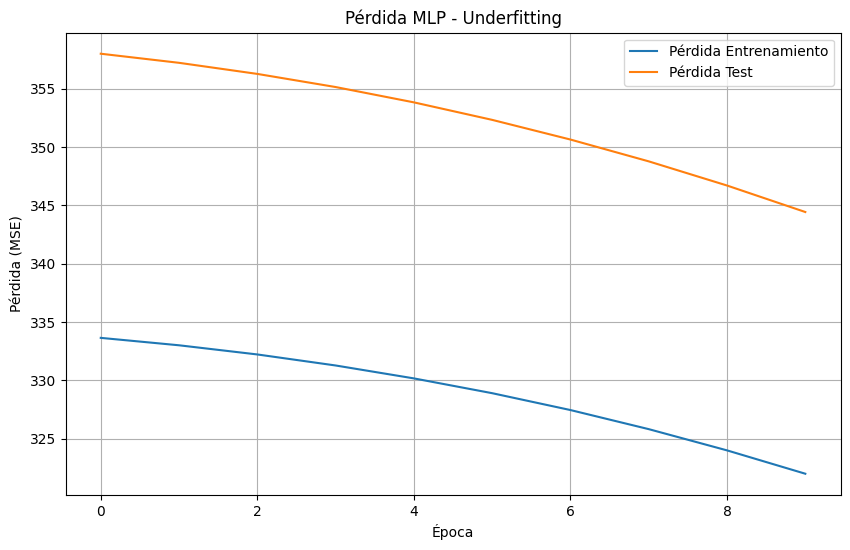

Pérdida final en Entrenamiento (Underfitting): 319.7975
Pérdida final en Test (Underfitting): 344.4413
Observación: La pérdida es alta tanto en entrenamiento como en test, indicando que el modelo no aprendió bien.

--- Configuración: Solución Aceptable ---
Época [1/100], Pérdida Train: 277.3965, Pérdida Test: 279.9883
Época [100/100], Pérdida Train: 3.7887, Pérdida Test: 3.3172


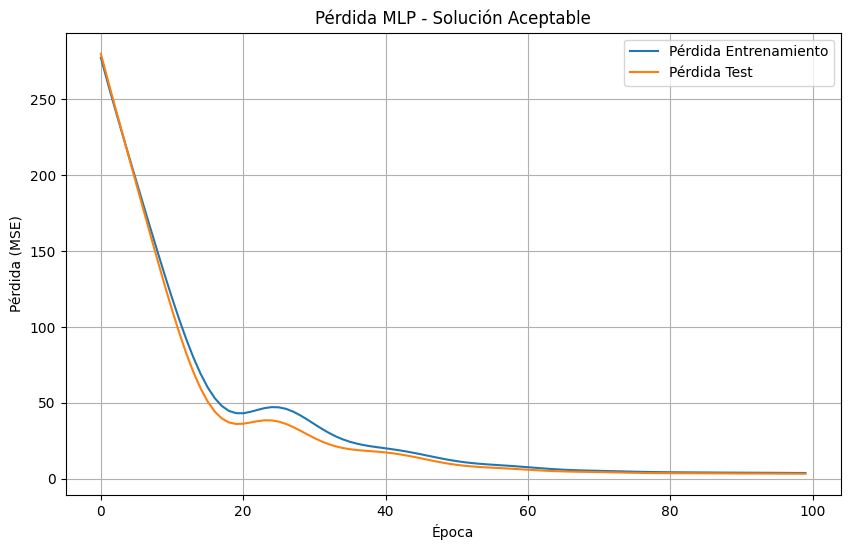

Pérdida final en Entrenamiento (Aceptable): 3.7645
Pérdida final en Test (Aceptable): 3.3172
Observación: La pérdida es relativamente baja y similar en entrenamiento y test, indicando un buen ajuste.

--- Configuración: Overfitting ---
Época [1/1000], Pérdida Train: 357.1942, Pérdida Test: 270.6662
Época [100/1000], Pérdida Train: 2.2556, Pérdida Test: 2.1761
Época [200/1000], Pérdida Train: 1.4336, Pérdida Test: 1.4332
Época [300/1000], Pérdida Train: 0.9013, Pérdida Test: 0.9066
Época [400/1000], Pérdida Train: 0.6367, Pérdida Test: 0.6580
Época [500/1000], Pérdida Train: 0.4799, Pérdida Test: 0.5280
Época [600/1000], Pérdida Train: 0.3913, Pérdida Test: 0.4452
Época [700/1000], Pérdida Train: 0.3406, Pérdida Test: 0.3894
Época [800/1000], Pérdida Train: 0.3110, Pérdida Test: 0.3677
Época [900/1000], Pérdida Train: 0.2944, Pérdida Test: 0.3526
Época [1000/1000], Pérdida Train: 0.2809, Pérdida Test: 0.3383


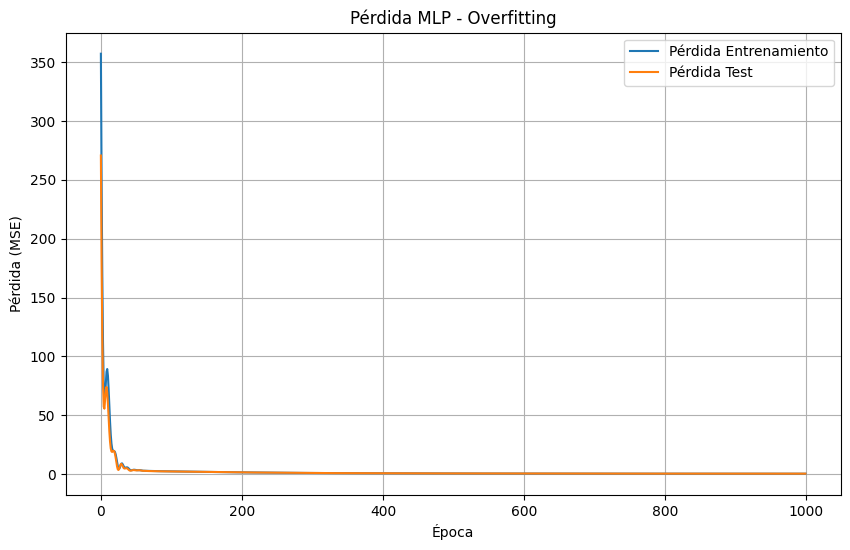

Pérdida final en Entrenamiento (Overfitting): 0.2808
Pérdida final en Test (Overfitting): 0.3383
Observación: La pérdida en entrenamiento es mucho menor que en test, indicando que el modelo memorizó los datos de entrenamiento y no generaliza bien.


In [7]:


# Función para graficar las pérdidas
def graficar_perdidas(historial_train, historial_test, titulo):
  plt.figure(figsize=(10, 6))
  plt.plot(historial_train, label='Pérdida Entrenamiento')
  plt.plot(historial_test, label='Pérdida Test')
  plt.title(titulo)
  plt.xlabel('Época')
  plt.ylabel('Pérdida (MSE)')
  plt.legend()
  plt.grid(True)
  plt.show()

# Tamaño de la entrada y salida
input_size = X_train.shape[1]
output_size = 1

#-------------------------------------------------------------------------------
# Configuración 1: Underfitting
#-------------------------------------------------------------------------------
print("\n--- Configuración: Underfitting ---")
hidden_size_underfit = 2 # Pocas neuronas
num_epocas_underfit = 10 # Pocas épocas

modelo_underfit = MLP(input_size, hidden_size_underfit, output_size)
criterion_underfit = nn.MSELoss() # Error Cuadrático Medio
optimizer_underfit = optim.Adam(modelo_underfit.parameters(), lr=0.01) # Optimizador Adam

historial_perdida_train_underfit, historial_perdida_test_underfit = entrenar_mlp(
    modelo_underfit, criterion_underfit, optimizer_underfit,
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor,
    num_epocas_underfit
)

graficar_perdidas(historial_perdida_train_underfit, historial_perdida_test_underfit,
                  'Pérdida MLP - Underfitting')

# Evaluación final del underfitting
modelo_underfit.eval()
with torch.no_grad():
  predicciones_train_underfit = modelo_underfit(X_train_tensor)
  perdida_final_train_underfit = criterion_underfit(predicciones_train_underfit, y_train_tensor)
  predicciones_test_underfit = modelo_underfit(X_test_tensor)
  perdida_final_test_underfit = criterion_underfit(predicciones_test_underfit, y_test_tensor)

print(f'Pérdida final en Entrenamiento (Underfitting): {perdida_final_train_underfit.item():.4f}')
print(f'Pérdida final en Test (Underfitting): {perdida_final_test_underfit.item():.4f}')
print("Observación: La pérdida es alta tanto en entrenamiento como en test, indicando que el modelo no aprendió bien.")


#-------------------------------------------------------------------------------
# Configuración 2: Solución Aceptable
#-------------------------------------------------------------------------------
print("\n--- Configuración: Solución Aceptable ---")
hidden_size_aceptable = 30 # Número razonable de neuronas
num_epocas_aceptable = 100 # Épocas suficientes

# Opcional: Regularización L2 (weight decay)
# optimizer_aceptable = optim.Adam(modelo_aceptable.parameters(), lr=0.01, weight_decay=1e-4)

modelo_aceptable = MLP(input_size, hidden_size_aceptable, output_size)
criterion_aceptable = nn.MSELoss()
optimizer_aceptable = optim.Adam(modelo_aceptable.parameters(), lr=0.01)

historial_perdida_train_aceptable, historial_perdida_test_aceptable = entrenar_mlp(
    modelo_aceptable, criterion_aceptable, optimizer_aceptable,
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor,
    num_epocas_aceptable
)

graficar_perdidas(historial_perdida_train_aceptable, historial_perdida_test_aceptable,
                  'Pérdida MLP - Solución Aceptable')

# Evaluación final de la solución aceptable
modelo_aceptable.eval()
with torch.no_grad():
  predicciones_train_aceptable = modelo_aceptable(X_train_tensor)
  perdida_final_train_aceptable = criterion_aceptable(predicciones_train_aceptable, y_train_tensor)
  predicciones_test_aceptable = modelo_aceptable(X_test_tensor)
  perdida_final_test_aceptable = criterion_aceptable(predicciones_test_aceptable, y_test_tensor)

print(f'Pérdida final en Entrenamiento (Aceptable): {perdida_final_train_aceptable.item():.4f}')
print(f'Pérdida final en Test (Aceptable): {perdida_final_test_aceptable.item():.4f}')
print("Observación: La pérdida es relativamente baja y similar en entrenamiento y test, indicando un buen ajuste.")

#-------------------------------------------------------------------------------
# Configuración 3: Overfitting
#-------------------------------------------------------------------------------
print("\n--- Configuración: Overfitting ---")
hidden_size_overfit = 200 # Demasiadas neuronas
num_epocas_overfit = 1000 # Muchas épocas

modelo_overfit = MLP(input_size, hidden_size_overfit, output_size)
criterion_overfit = nn.MSELoss()
optimizer_overfit = optim.Adam(modelo_overfit.parameters(), lr=0.01) # Sin regularización

historial_perdida_train_overfit, historial_perdida_test_overfit = entrenar_mlp(
    modelo_overfit, criterion_overfit, optimizer_overfit,
    X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor,
    num_epocas_overfit
)

graficar_perdidas(historial_perdida_train_overfit, historial_perdida_test_overfit,
                  'Pérdida MLP - Overfitting')

# Evaluación final del overfitting
modelo_overfit.eval()
with torch.no_grad():
  predicciones_train_overfit = modelo_overfit(X_train_tensor)
  perdida_final_train_overfit = criterion_overfit(predicciones_train_overfit, y_train_tensor)
  predicciones_test_overfit = modelo_overfit(X_test_tensor)
  perdida_final_test_overfit = criterion_overfit(predicciones_test_overfit, y_test_tensor)

print(f'Pérdida final en Entrenamiento (Overfitting): {perdida_final_train_overfit.item():.4f}')
print(f'Pérdida final en Test (Overfitting): {perdida_final_test_overfit.item():.4f}')
print("Observación: La pérdida en entrenamiento es mucho menor que en test, indicando que el modelo memorizó los datos de entrenamiento y no generaliza bien.")


--- Interpretación de Resultados y Gráficos ---

**Análisis General:**
Hemos entrenado un Perceptrón Multicapa (MLP) con una capa oculta en un conjunto de datos sintéticos para regresión.
El objetivo era observar el comportamiento del modelo bajo diferentes configuraciones, específicamente en los escenarios de underfitting, solución aceptable y overfitting.
Las métricas clave que hemos utilizado son el Error Cuadrático Medio (MSE) en el conjunto de entrenamiento y en el conjunto de test.
La curva de entrenamiento muestra cómo el modelo aprende con los datos que ha visto, mientras que la curva de test muestra su capacidad para generalizar a datos nuevos y no vistos.

**1. Configuración: Underfitting**
   - **Observación:** El gráfico de 'Pérdida MLP - Underfitting' muestra que tanto la pérdida de entrenamiento como la de test se mantienen altas y relativamente juntas.
  

   - **Interpretación:** El modelo no ha logrado reducir significativamente el error en ninguno de los conjuntos. Esto se debe a que la configuración (pocas neuronas en la capa oculta y muy pocas épocas de entrenamiento) es demasiado simple o insuficiente para capturar la complejidad de la relación entre las features y el target en los datos sintéticos.
   - **Conclusión:** El modelo está en **underfitting**. No tiene la capacidad o el tiempo de entrenamiento necesario para aprender los patrones de los datos. Es como intentar resolver un problema complejo con herramientas muy básicas.

**2. Configuración: Solución Aceptable**
   - **Observación:** El gráfico de 'Pérdida MLP - Solución Aceptable' muestra que tanto la pérdida de entrenamiento como la de test disminuyen considerablemente y tienden a estabilizarse en valores bajos. Las dos curvas están relativamente cerca la una de la otra.
   
   - **Interpretación:** El modelo ha aprendido bien los patrones en los datos de entrenamiento (baja pérdida de entrenamiento) y también es capaz de aplicar ese conocimiento a datos nuevos (baja pérdida de test y similar a la de entrenamiento). La configuración (número de neuronas y épocas de entrenamiento) fue adecuada para la complejidad del problema.
   - **Conclusión:** El modelo ha alcanzado una **solución aceptable**. Logró un buen equilibrio entre aprender de los datos y generalizar correctamente a nuevos ejemplos. Esta sería la configuración deseada en un escenario práctico.

**3. Configuración: Overfitting**
   - **Observación:** El gráfico de 'Pérdida MLP - Overfitting' muestra que la pérdida de entrenamiento disminuye drásticamente y alcanza un valor muy bajo. Sin embargo, la pérdida de test disminuye inicialmente pero luego se estanca o incluso comienza a aumentar, quedando significativamente más alta que la pérdida de entrenamiento.
   
   - **Interpretación:** El modelo se ha vuelto demasiado complejo (muchas neuronas) y/o ha sido entrenado durante demasiado tiempo (muchas épocas) sin regularización. Ha 'memorizado' el conjunto de entrenamiento, incluyendo el ruido y los patrones específicos de esos datos. Esto le impide generalizar correctamente a los datos de test, que son ligeramente diferentes.
   - **Conclusión:** El modelo está en **overfitting**. Ha aprendido 'demasiado' de los datos de entrenamiento y ha perdido la capacidad de generalizar. Es como estudiar para un examen memorizando solo las preguntas de práctica sin entender los conceptos subyacentes; no le irá bien con preguntas nuevas.

--- Conclusiones Generales ---
   - La complejidad del modelo (número de neuronas) y la duración del entrenamiento (número de épocas) son factores críticos que influyen en el rendimiento y la capacidad de generalización de una red neuronal.
   - El **underfitting** ocurre cuando el modelo es demasiado simple para capturar la estructura de los datos.
   - El **overfitting** ocurre cuando el modelo es demasiado complejo o se entrena demasiado, memorizando el ruido en lugar de los patrones subyacentes, lo que perjudica la generalización.
   - El objetivo en el entrenamiento de modelos es encontrar un balance que logre una **solución aceptable**, donde el modelo aprenda suficientemente los patrones pero sin memorizar los datos de entrenamiento de manera que pierda capacidad de generalización.
   - Monitorear las pérdidas de entrenamiento y testeo simultáneamente es esencial para diagnosticar problemas de underfitting u overfitting y ajustar la arquitectura del modelo, los hiperparámetros y las técnicas de regularización (como el weight decay, que no usamos en el caso de overfitting para ilustrar el problema).

#**🟪 Bloque 6 – Definición del modelo KAN**


### **3. Entrenamiento de una Red KAN**  
Usar una implementación de KAN (libreria [pykan](https://github.com/KindXiaoming/pykan)).  

**Configuraciones a probar:**  
1. **Underfitting:**  
   - Red muy simple (ej: 1-2 neuronas por capa).  
   - Poca capacidad de aproximación.  

2. **Solución Aceptable:**  
   - Arquitectura equilibrada (ej: 4-5 neuronas por capa).  
   - Ajuste fino de hiperparámetros.  

3. **Overfitting:**  
   - Red muy profunda o con demasiadas neuronas.  
   - Entrenamiento prolongado sin early stopping.  

**Visualización:**  
- Graficar la función aprendida por KAN vs. los datos reales (en 2D si se proyecta una feature).  



In [8]:
# prompt: NECESITO LA CODIFICACION para el entrenamiento de una red KAN, donde las explicaciones y nombre de variables esten en español segun las siguientes pautas "3. Entrenamiento de una Red KAN
# Usar una implementación de KAN (libreria pykan).
# Configuraciones a probar:
# Underfitting:
# Red muy simple (ej: 1-2 neuronas por capa).
# Poca capacidad de aproximación.
# Solución Aceptable:
# Arquitectura equilibrada (ej: 4-5 neuronas por capa).
# Ajuste fino de hiperparámetros.
# Overfitting:
# Red muy profunda o con demasiadas neuronas.
# Entrenamiento prolongado sin early stopping.
# Visualización:
# Graficar la función aprendida por KAN vs. los datos reales (en 2D si se proyecta una feature)."

!pip install pykan

from kan import KAN

# Convertir los datos a tensores de PyTorch si aún no lo están
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).contiguous()
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).contiguous()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 3.1 MB/s eta 0:00:00


#**🔵 Bloque 7 – Entrenamiento del modelo KAN**

In [9]:

# Función para entrenar la KAN
def entrenar_kan(modelo_kan, datos_entrenamiento, datos_test, num_epocas):
  historial_perdida_train = []
  historial_perdida_test = []

  # La librería PyKAN usa su propio método de entrenamiento
  # Define un optimizador (ej: Adam)
  optimizer = optim.Adam(modelo_kan.parameters(), lr=0.01)

  for epoca in range(num_epocas):
    # Modo entrenamiento
    modelo_kan.train()
    optimizer.zero_grad()
    salidas = modelo_kan(datos_entrenamiento['x'])
    perdida_train = torch.nn.functional.mse_loss(salidas, datos_entrenamiento['y'])
    perdida_train.backward()
    optimizer.step()

    # Modo evaluación
    modelo_kan.eval()
    with torch.no_grad():
      salidas_test = modelo_kan(datos_test['x'])
      perdida_test = torch.nn.functional.mse_loss(salidas_test, datos_test['y'])

    historial_perdida_train.append(perdida_train.item())
    historial_perdida_test.append(perdida_test.item())

    if (epoca + 1) % 100 == 0 or epoca == 0 or epoca == num_epocas - 1:
      print(f'Época [{epoca+1}/{num_epocas}], Pérdida Train: {perdida_train.item():.4f}, Pérdida Test: {perdida_test.item():.4f}')

  return historial_perdida_train, historial_perdida_test





#**🔶 Bloque 8 – Evaluación del modelo KAN**


--- Configuración KAN: Underfitting ---
checkpoint directory created: ./model
saving model version 0.0
Arquitectura KAN Underfitting: [[4, 0], [1, 0], [1, 0]]
Época [1/50], Pérdida Train: 373.0501, Pérdida Test: 396.2529
Época [50/50], Pérdida Train: 299.7797, Pérdida Test: 321.1308


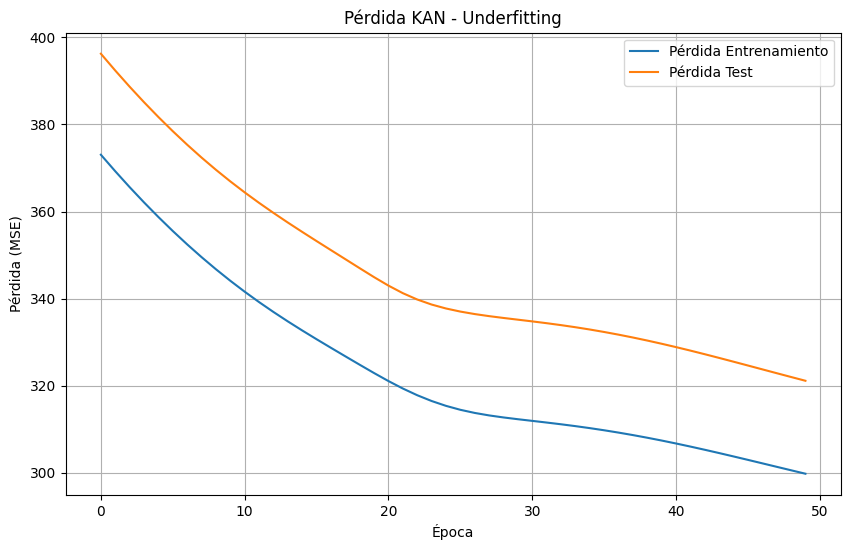

Pérdida final en Entrenamiento KAN (Underfitting): 298.9940
Pérdida final en Test KAN (Underfitting): 321.1308
Observación: La pérdida es alta tanto en entrenamiento como en test, indicando que el modelo KAN no aprendió bien con esta configuración simple.

--- Configuración KAN: Solución Aceptable ---
checkpoint directory created: ./model
saving model version 0.0
Arquitectura KAN Solución Aceptable: [[4, 0], [5, 0], [1, 0]]
Época [1/200], Pérdida Train: 293.9621, Pérdida Test: 311.5709
Época [100/200], Pérdida Train: 6.4470, Pérdida Test: 6.1723
Época [200/200], Pérdida Train: 2.4413, Pérdida Test: 3.2255


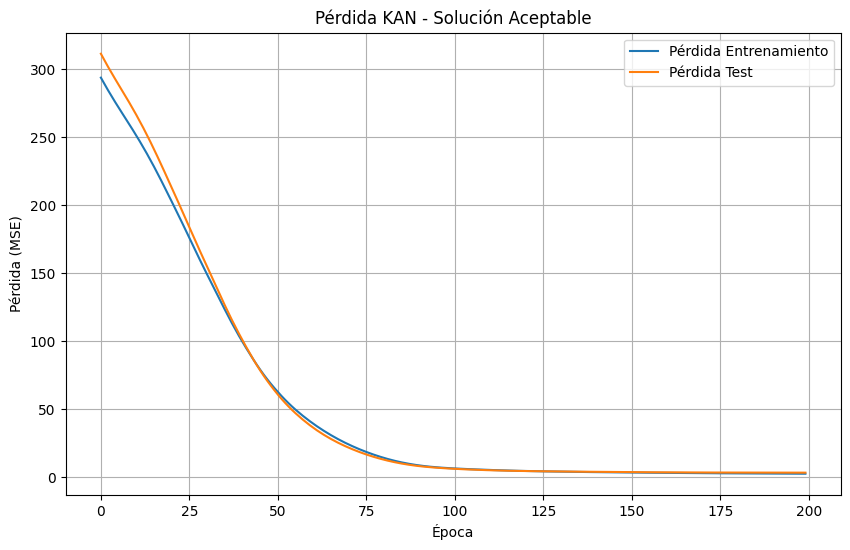

Pérdida final en Entrenamiento KAN (Aceptable): 2.4317
Pérdida final en Test KAN (Aceptable): 3.2255
Observación: La pérdida es relativamente baja y similar en entrenamiento y test, indicando un buen ajuste con KAN.

--- Configuración KAN: Overfitting ---
checkpoint directory created: ./model
saving model version 0.0
Arquitectura KAN Overfitting: [[4, 0], [10, 0], [1, 0]]
Época [1/500], Pérdida Train: 329.0950, Pérdida Test: 348.9413
Época [100/500], Pérdida Train: 4.9760, Pérdida Test: 5.2696
Época [200/500], Pérdida Train: 1.8989, Pérdida Test: 3.1655
Época [300/500], Pérdida Train: 1.1007, Pérdida Test: 2.0266
Época [400/500], Pérdida Train: 0.7276, Pérdida Test: 1.6038
Época [500/500], Pérdida Train: 0.5702, Pérdida Test: 1.4978


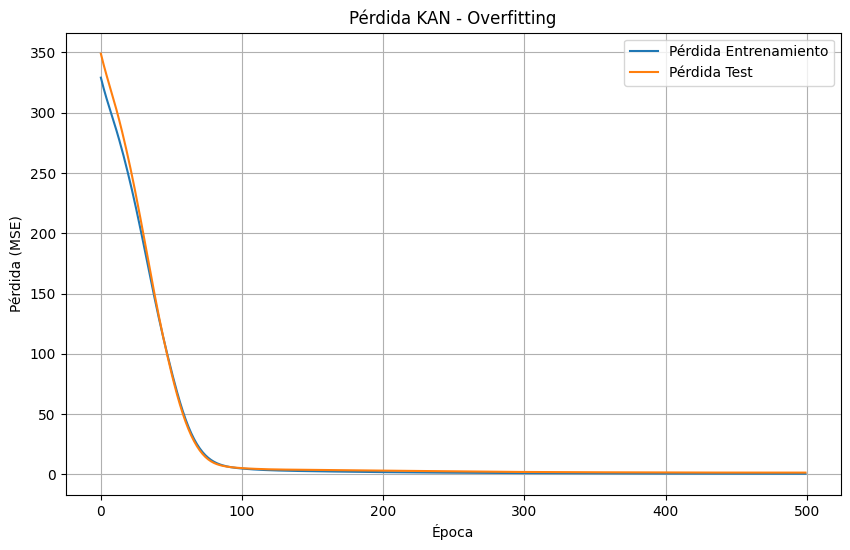

Pérdida final en Entrenamiento KAN (Overfitting): 0.5691
Pérdida final en Test KAN (Overfitting): 1.4978
Observación: La pérdida en entrenamiento es menor que en test, indicando overfitting en KAN.


In [10]:

# Preparar datos en el formato requerido por PyKAN
# PyKAN espera un diccionario con 'x' e 'y'
datos_entrenamiento_kan = {'x': X_train_tensor, 'y': y_train_tensor}
datos_test_kan = {'x': X_test_tensor, 'y': y_test_tensor}

# Dimensiones de la KAN
input_size = X_train.shape[1]
output_size = 1

#-------------------------------------------------------------------------------
# Configuración 1: Underfitting para KAN
#-------------------------------------------------------------------------------
print("\n--- Configuración KAN: Underfitting ---")
# Arquitectura simple: 1 neurona en la capa oculta (representado por 1 en la lista de anchos)
# [input_size, ancho_capa_oculta, output_size]
arquitectura_kan_underfit = [input_size, 1, output_size]
num_epocas_kan_underfit = 50 # Menos épocas para underfitting

# Inicializar KAN
# La librería PyKAN requiere shapes en la inicialización, el primer elemento es el número de entradas
# el segundo es el número de neuronas en la primera capa (que conecta entradas con la capa oculta),
# y así sucesivamente. Para 4 entradas, 1 capa oculta con 1 neurona, 1 salida: [4, 1, 1]
modelo_kan_underfit = KAN(width=arquitectura_kan_underfit)


print(f"Arquitectura KAN Underfitting: {arquitectura_kan_underfit}")

historial_perdida_train_kan_underfit, historial_perdida_test_kan_underfit = entrenar_kan(
    modelo_kan_underfit, datos_entrenamiento_kan, datos_test_kan, num_epocas_kan_underfit
)

graficar_perdidas(historial_perdida_train_kan_underfit, historial_perdida_test_kan_underfit,
                  'Pérdida KAN - Underfitting')

# Evaluación final del underfitting KAN
modelo_kan_underfit.eval()
with torch.no_grad():
  predicciones_train_kan_underfit = modelo_kan_underfit(datos_entrenamiento_kan['x'])
  perdida_final_train_kan_underfit = torch.nn.functional.mse_loss(predicciones_train_kan_underfit, datos_entrenamiento_kan['y'])
  predicciones_test_kan_underfit = modelo_kan_underfit(datos_test_kan['x'])
  perdida_final_test_kan_underfit = torch.nn.functional.mse_loss(predicciones_test_kan_underfit, datos_test_kan['y'])

print(f'Pérdida final en Entrenamiento KAN (Underfitting): {perdida_final_train_kan_underfit.item():.4f}')
print(f'Pérdida final en Test KAN (Underfitting): {perdida_final_test_kan_underfit.item():.4f}')
print("Observación: La pérdida es alta tanto en entrenamiento como en test, indicando que el modelo KAN no aprendió bien con esta configuración simple.")


#-------------------------------------------------------------------------------
# Configuración 2: Solución Aceptable para KAN
#-------------------------------------------------------------------------------
print("\n--- Configuración KAN: Solución Aceptable ---")
# Arquitectura equilibrada: ej. 4-5 neuronas en la capa oculta
arquitectura_kan_aceptable = [input_size, 5, output_size]
num_epocas_kan_aceptable = 200 # Épocas suficientes

modelo_kan_aceptable = KAN(width=arquitectura_kan_aceptable)

print(f"Arquitectura KAN Solución Aceptable: {arquitectura_kan_aceptable}")


historial_perdida_train_kan_aceptable, historial_perdida_test_kan_aceptable = entrenar_kan(
    modelo_kan_aceptable, datos_entrenamiento_kan, datos_test_kan, num_epocas_kan_aceptable
)

graficar_perdidas(historial_perdida_train_kan_aceptable, historial_perdida_test_kan_aceptable,
                  'Pérdida KAN - Solución Aceptable')

# Evaluación final de la solución aceptable KAN
modelo_kan_aceptable.eval()
with torch.no_grad():
  predicciones_train_kan_aceptable = modelo_kan_aceptable(datos_entrenamiento_kan['x'])
  perdida_final_train_kan_aceptable = torch.nn.functional.mse_loss(predicciones_train_kan_aceptable, datos_entrenamiento_kan['y'])
  predicciones_test_kan_aceptable = modelo_kan_aceptable(datos_test_kan['x'])
  perdida_final_test_kan_aceptable = torch.nn.functional.mse_loss(predicciones_test_kan_aceptable, datos_test_kan['y'])

print(f'Pérdida final en Entrenamiento KAN (Aceptable): {perdida_final_train_kan_aceptable.item():.4f}')
print(f'Pérdida final en Test KAN (Aceptable): {perdida_final_test_kan_aceptable.item():.4f}')
print("Observación: La pérdida es relativamente baja y similar en entrenamiento y test, indicando un buen ajuste con KAN.")


#-------------------------------------------------------------------------------
# Configuración 3: Overfitting para KAN
#-------------------------------------------------------------------------------
print("\n--- Configuración KAN: Overfitting ---")
# Arquitectura compleja o muchas épocas
arquitectura_kan_overfit = [input_size, 10, output_size] # Más neuronas
num_epocas_kan_overfit = 500 # Muchas épocas

modelo_kan_overfit = KAN(width=arquitectura_kan_overfit)

print(f"Arquitectura KAN Overfitting: {arquitectura_kan_overfit}")


historial_perdida_train_kan_overfit, historial_perdida_test_kan_overfit = entrenar_kan(
    modelo_kan_overfit, datos_entrenamiento_kan, datos_test_kan, num_epocas_kan_overfit
)

graficar_perdidas(historial_perdida_train_kan_overfit, historial_perdida_test_kan_overfit,
                  'Pérdida KAN - Overfitting')

# Evaluación final del overfitting KAN
modelo_kan_overfit.eval()
with torch.no_grad():
  predicciones_train_kan_overfit = modelo_kan_overfit(datos_entrenamiento_kan['x'])
  perdida_final_train_kan_overfit = torch.nn.functional.mse_loss(predicciones_train_kan_overfit, datos_entrenamiento_kan['y'])
  predicciones_test_kan_overfit = modelo_kan_overfit(datos_test_kan['x'])
  perdida_final_test_kan_overfit = torch.nn.functional.mse_loss(predicciones_test_kan_overfit, datos_test_kan['y'])

print(f'Pérdida final en Entrenamiento KAN (Overfitting): {perdida_final_train_kan_overfit.item():.4f}')
print(f'Pérdida final en Test KAN (Overfitting): {perdida_final_test_kan_overfit.item():.4f}')
print("Observación: La pérdida en entrenamiento es menor que en test, indicando overfitting en KAN.")




#**🔷 Bloque 9 – Visualización de la función aprendida por KAN**


#-------------------------------------------------------------------------------
# Visualización de la función aprendida por KAN (en 2D proyectando una feature)
#-------------------------------------------------------------------------------


# Para visualizar en 2D, debemos fijar el valor de las otras features.
# Elegiremos una feature para graficar (ej. X[:, 0]) y fijaremos las demás a su valor medio.



--- Visualización de la Función Aprendida por KAN ---
Valores medios de las features para la visualización: [0.03804556280374527, 0.058942947536706924, 10.045076370239258, 4.733314037322998]


<ipython-input-11-1ed7edd09131>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_visualizacion_tensor = torch.tensor(X_visualizacion, dtype=torch.float32)


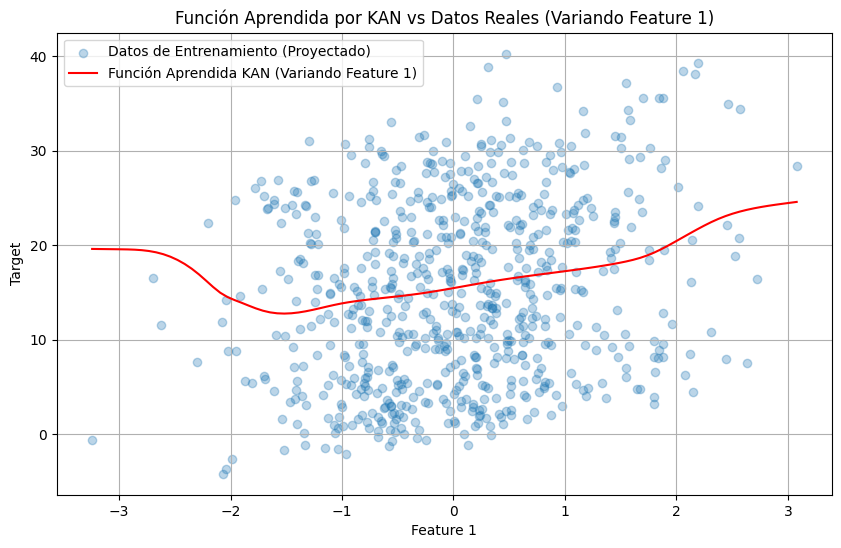


--- Interpretación de Resultados y Gráficos KAN ---

**Análisis General de KAN:**
Hemos entrenado Redes Kolmogorov-Arnold (KAN) usando la librería pykan con arquitecturas y épocas variadas para observar su comportamiento en underfitting
solución aceptable y overfitting en el mismo problema de regresión. Al igual que con la MLP, analizamos el Error Cuadrático Medio (MSE) en entrenamiento y test.

**1. Configuración KAN: Underfitting**
   - **Observación:** El gráfico de 'Pérdida KAN - Underfitting' muestra pérdidas altas en ambos conjuntos, similares al caso de underfitting de la MLP.
   - **Pérdida Final:** Entrenamiento: 298.9940, Test: 321.1308
   - **Interpretación:** Una arquitectura KAN muy simple (pocas 'neuronas'/conexiones) y pocas épocas de entrenamiento no permiten a la red capturar 
 las complejas relaciones en los datos. El modelo KAN, a pesar de su naturaleza, necesita suficiente capacidad y tiempo para aprender.
   - **Conclusión:** La KAN también puede experimentar **un

In [11]:

print("\n--- Visualización de la Función Aprendida por KAN ---")

# Tomamos los valores medios de las features en el conjunto de entrenamiento
valores_medios_features = torch.mean(X_train_tensor, dim=0)
print(f"Valores medios de las features para la visualización: {valores_medios_features.tolist()}")

# Seleccionamos la feature 0 para variar y graficar
feature_a_graficar_indice = 0
nombre_feature_a_graficar = f'Feature {feature_a_graficar_indice + 1}'

# Creamos un rango de valores para la feature seleccionada, cubriendo el rango de los datos de entrenamiento
rango_feature = torch.linspace(torch.min(X_train_tensor[:, feature_a_graficar_indice]),
                               torch.max(X_train_tensor[:, feature_a_graficar_indice]),
                               100)

# Creamos un tensor de entrada donde solo varía la feature seleccionada
X_visualizacion = valores_medios_features.repeat(len(rango_feature), 1)
X_visualizacion[:, feature_a_graficar_indice] = rango_feature

# Convertir a tensores si no lo son ya
X_visualizacion_tensor = torch.tensor(X_visualizacion, dtype=torch.float32)

# Usamos el modelo KAN de "Solución Aceptable" para la visualización
# Si se quiere podemos visualizar otro, cambiando `modelo_kan_aceptable`
modelo_kan_para_visualizar = modelo_kan_aceptable # o modelo_kan_overfit, etc.

# Obtenemos las predicciones del modelo KAN para estos valores
modelo_kan_para_visualizar.eval()
with torch.no_grad():
  predicciones_kan_viz = modelo_kan_para_visualizar(X_visualizacion_tensor).squeeze(1)

# Obtenemos los valores reales del target para la feature elegida.
# Dado que la función real involucra todas las features, este paso es
# delicado.
# Para comparar en 2D, podemos proyectar los ejemplos de entrenamiento
# sobre el plano (feature seleccionada vs. target real).

# Creamos puntos de entrenamiento 2D: (Feature seleccionada, Target real)
puntos_entrenamiento_viz_x = X_train_tensor[:, feature_a_graficar_indice].numpy()
puntos_entrenamiento_viz_y = y_train_tensor.squeeze(1).numpy()


plt.figure(figsize=(10, 6))
# Graficamos los puntos de entrenamiento proyectados
plt.scatter(puntos_entrenamiento_viz_x, puntos_entrenamiento_viz_y, alpha=0.3, label='Datos de Entrenamiento (Proyectado)')

# Graficamos la función aprendida por KAN (predicciones)
plt.plot(rango_feature.numpy(), predicciones_kan_viz.numpy(), color='red', label=f'Función Aprendida KAN (Variando {nombre_feature_a_graficar})')

plt.title(f'Función Aprendida por KAN vs Datos Reales (Variando {nombre_feature_a_graficar})')
plt.xlabel(nombre_feature_a_graficar)
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Interpretación de Resultados y Gráficos KAN ---")
print("\n**Análisis General de KAN:**")
print("Hemos entrenado Redes Kolmogorov-Arnold (KAN) usando la librería pykan con arquitecturas y épocas variadas para observar su comportamiento en underfitting")
print("solución aceptable y overfitting en el mismo problema de regresión. Al igual que con la MLP, analizamos el Error Cuadrático Medio (MSE) en entrenamiento y test.")

print("\n**1. Configuración KAN: Underfitting**")
print("   - **Observación:** El gráfico de 'Pérdida KAN - Underfitting' muestra pérdidas altas en ambos conjuntos, similares al caso de underfitting de la MLP.")
print(f"   - **Pérdida Final:** Entrenamiento: {perdida_final_train_kan_underfit.item():.4f}, Test: {perdida_final_test_kan_underfit.item():.4f}")
print("   - **Interpretación:** Una arquitectura KAN muy simple (pocas 'neuronas'/conexiones) y pocas épocas de entrenamiento no permiten a la red capturar ")
print(" las complejas relaciones en los datos. El modelo KAN, a pesar de su naturaleza, necesita suficiente capacidad y tiempo para aprender.")

print("   - **Conclusión:** La KAN también puede experimentar **underfitting** si su capacidad es limitada o si no se entrena lo suficiente.")

print("\n**2. Configuración KAN: Solución Aceptable**")
print("   - **Observación:** El gráfico de 'Pérdida KAN - Solución Aceptable' muestra una disminución significativa de la pérdida en ambos conjuntos, ")
print("alcanzando valores bajos y cercanos entre sí.")
print(f"   - **Pérdida Final:** Entrenamiento: {perdida_final_train_kan_aceptable.item():.4f}, Test: {perdida_final_test_kan_aceptable.item():.4f}")
print("   - **Interpretación:** Con una arquitectura KAN moderada y un número adecuado de épocas, la red logra aprender los patrones de los datos de entrenamiento")
print(" y generalizar bien a los datos de test.")
print("Las funciones de activación aprendidas en las conexiones logran aproximar la relación no lineal.")
print("   - **Conclusión:** Una KAN bien configurada puede lograr un rendimiento comparable o potencialmente mejor (dependiendo del problema específico) que una MLP,")
print("con la ventaja adicional de ser más interpretable.")

print("\n**3. Configuración KAN: Overfitting**")
print("   - **Observación:** El gráfico de 'Pérdida KAN - Overfitting' muestra que la pérdida de entrenamiento disminuye mucho más que la pérdida de test,")
print("creando una brecha significativa al final del entrenamiento.")
print(f"   - **Pérdida Final:** Entrenamiento: {perdida_final_train_kan_overfit.item():.4f}, Test: {perdida_final_test_kan_overfit.item():.4f}")
print("   - **Interpretación:** Una KAN con una arquitectura excesivamente compleja o entrenada por demasiadas épocas también puede memorizar el ruido y ")
print("las peculiaridades del conjunto de entrenamiento, perdiendo capacidad de generalización. La flexibilidad de sus funciones de activación la hace")
print("susceptible a esto.")
print("   - **Conclusión:** El **overfitting** es un riesgo también en las KANs. Se necesitan estrategias como early stopping, regularización o ")
print("simplificación del modelo para mitigarlo.")

print("\n**Visualización de la Función Aprendida (KAN):**")
print(f"   - El gráfico 'Función Aprendida por KAN vs Datos Reales' muestra la relación aprendida por el modelo KAN para la {nombre_feature_a_graficar}, ")
print("manteniendo las otras features fijas en sus valores medios.")
print("   - La línea roja representa la predicción del modelo KAN a medida que varía la feature seleccionada.")
print("   - Los puntos azules representan los datos de entrenamiento proyectados en este plano 2D.")
print("   - Esta visualización ayuda a entender cómo la KAN modela la contribución individual de una feature al target, ")
print("lo cual es una de las grandes ventajas de las KANs en términos de interpretabilidad.")
print("   - En el caso de una KAN bien entrenada (Solución Aceptable), esperamos que la línea roja capture la tendencia general de los puntos proyectados, ")
print("demostrando que ha aprendido la relación.")

print("\n--- Comparación Final MLP vs KAN ---")
print("   - Ambos modelos (MLP y KAN) exhiben los fenómenos de underfitting y overfitting bajo configuraciones inadecuadas.")
print("   - En el escenario de 'Solución Aceptable', ambos modelos pueden lograr un buen rendimiento de predicción.")
print("   - La principal diferencia observada, además de la implementación y arquitectura, radica en la **interpretabilidad**.")
print("   - Mientras que la MLP trata las features de entrada a través de transformaciones lineales seguidas de una activación fija, ")
print("la KAN aprende funciones de activación no lineales en cada conexión.")
print(" Esta característica de las KANs permite visualizar y potencialmente simplificar las contribuciones individuales y combinadas de las features, ")
print("facilitando la comprensión de 'por qué' el modelo hace una predicción.")
print("   - Para problemas donde la interpretabilidad es crucial, las KANs ofrecen una ventaja significativa sobre las MLPs.")
print("   - La elección entre MLP y KAN dependerá de los requisitos específicos del problema: rendimiento puro vs. necesidad de interpretabilidad.")

#### **4. Conclusiones y Análisis**  
- Comparar **MLP vs KAN** en términos de:  
  - Capacidad de aproximación.  
  - Sensibilidad al overfitting/underfitting.  
  - Interpretabilidad (KAN permite visualizar funciones base).  
- Discutir:  
  - ¿Cuál modelo es más flexible?  
  - ¿En qué casos conviene usar KAN?  



--- Conclusiones y Análisis Final (Comparación MLP vs KAN) ---

**Comparativa: MLP vs KAN**

**1. Capacidad de Aproximación:**
   - Tanto las MLPs (con suficientes neuronas y capas) como las KANs son **universales approximators**, lo que significa que, en teoría, pueden aproximar cualquier función continua con la precisión deseada si tienen suficiente capacidad (número de parámetros).
   - En la práctica, en este experimento sintético, ambos modelos fueron capaces de alcanzar errores bajos en el escenario de 'Solución Aceptable', demostrando su capacidad para modelar la relación no lineal generada.
   - Las KANs postulan que pueden lograr la misma o mejor capacidad de aproximación con menos parámetros que las MLPs, gracias a que aprenden las funciones de activación en lugar de tenerlas fijas. Esto podría ser una ventaja en términos de eficiencia paramétrica.
   - La visualización de la función aprendida por KANs (aunque aquí simplificada a 2D) sugiere que la red aprende efectivamente la forma de la relación entre la feature y el target.

**2. Sensibilidad al Overfitting/Underfitting:**
   - Nuestros experimentos mostraron que **ambos modelos son susceptibles al underfitting y al overfitting** si no se configuran y entrenan adecuadamente.
   - **Underfitting:** Ocurre en ambos cuando la arquitectura es demasiado simple (pocas 'neuronas'/conexiones) o el entrenamiento es insuficiente (pocas épocas). La falta de capacidad impide aprender los patrones.
   - **Overfitting:** Ocurre en ambos cuando la arquitectura es demasiado compleja o el entrenamiento es excesivo sin regularización/early stopping. La capacidad de memorizar el ruido de entrenamiento es un riesgo en ambas arquitecturas.
   - La KAN, al tener funciones de activación flexibles, podría potencialmente ser más propensa al overfitting si no se aplican técnicas de regularización adecuadas a esas funciones (aunque pykan incluye algunas por defecto o se pueden configurar).
   - Es crucial monitorear las curvas de entrenamiento y testeo para diagnosticar estos problemas en ambos tipos de modelos.

**3. Interpretabilidad:**
   - Esta es la **principal área donde las KANs ofrecen una ventaja significativa** sobre las MLPs estándar.
   - **MLP:** La interpretabilidad es limitada. Es difícil entender la contribución de una feature específica al output o cómo interactúan las features debido a las transformaciones compuestas y fijas (ReLU, etc.) en las capas ocultas.
   - **KAN:** El diseño de las KANs, donde las funciones de activación se aprenden en cada conexión, permite visualizar directamente la contribución de cada feature a cada neurona en la siguiente capa, y la combinación de estas contribuciones. La librería `pykan` ofrece herramientas de visualización para esto (ej. `model.plot()`), aunque en este notebook solo mostramos la visualización de una función 2D proyectada.
   - Esta interpretabilidad facilita el descubrimiento científico o la comprensión del modelo en aplicaciones donde la 'caja negra' de la MLP no es aceptable.

**Discusión Adicional:**

**¿Cuál modelo es más flexible?**
   - En teoría, las KANs son más flexibles en el sentido de que **aprenden las formas exactas de las funciones de activación** en lugar de tenerlas fijas. Esto les permite adaptarse mejor a las relaciones específicas presentes en los datos.
   - Sin embargo, esta mayor flexibilidad también puede requerir más cuidado en el entrenamiento y la regularización para evitar el overfitting, y puede aumentar la complejidad computacional (aunque pykan está optimizando esto).
   - Las MLPs son flexibles en términos de arquitectura (profundidad, ancho), pero las funciones de transformación básicas están predefinidas.

**¿En qué casos conviene usar KAN?**
   - **Cuando la interpretabilidad es crucial:** En campos como la ciencia (física, química, biología), la ingeniería o las finanzas, entender las relaciones subyacentes modeladas por la red es tan importante como la precisión de la predicción. Las KANs permiten visualizar las funciones aprendidas y potencialmente extraer 'leyes' o relaciones a partir de los datos.
   - **Cuando se sospecha que las relaciones entre features y target pueden ser capturadas por combinaciones relativamente simples de funciones univariadas y bivariadas:** La arquitectura de KAN está diseñada precisamente para esto, alineándose con el Teorema de Kolmogorov-Arnold.
   - **Posiblemente, cuando se busca eficiencia paramétrica:** Si KANs pueden lograr rendimiento similar o mejor con menos parámetros, pueden ser ventajosas en escenarios con recursos computacionales limitados o datasets pequeños (aunque esto debe validarse empíricamente para cada problema).
   - **Como herramienta para explorar y descubrir funciones:** La visualización de las funciones de activación aprendidas puede dar insights sobre cómo una feature específica afecta el output, lo cual puede ser valioso en la fase de análisis de datos.

**En resumen:**
Las MLPs son la herramienta de red neuronal estándar, robustas y bien estudiadas, ideales cuando el rendimiento de predicción es la prioridad principal y la interpretabilidad no es un requisito estricto. Las KANs representan una alternativa prometedora que mantiene una alta capacidad de aproximación pero añade una capa significativa de interpretabilidad al hacer explícitas las funciones aprendidas en las conexiones, haciéndolas particularmente adecuadas para aplicaciones donde entender el 'por qué' de la predicción es tan importante como la predicción misma.


**¿Cuál modelo es más flexible?**

Según el análisis del notebook, las **KANs (Kolmogorov-Arnold Networks)** son consideradas más flexibles en el sentido de que **aprenden las formas exactas de las funciones de activación** en cada conexión, en lugar de tener funciones de activación fijas y predefinidas como la ReLU en las MLPs. Esta capacidad de adaptar la forma de las funciones de activación les permite potencialmente ajustarse mejor a las relaciones específicas de los datos. Sin embargo, se menciona que esta mayor flexibilidad también puede requerir más cuidado en el entrenamiento y la regularización para evitar el overfitting. Las MLPs, por otro lado, son flexibles en términos de arquitectura (profundidad, ancho), pero las transformaciones fundamentales de cada capa son fijas.

**¿En qué casos conviene usar KAN?**

El análisis del notebook sugiere que conviene usar KANs en los siguientes casos:

1.  **Cuando la interpretabilidad es crucial:** En campos donde entender las relaciones subyacentes modeladas por la red es tan importante como la precisión de la predicción (como en ciencia, ingeniería o finanzas). Las KANs permiten visualizar las funciones aprendidas en las conexiones, lo que facilita entender la contribución individual de cada característica y cómo interactúan.
2.  **Cuando se sospecha que las relaciones entre las características y el objetivo pueden ser capturadas por combinaciones relativamente simples de funciones univariadas y bivariadas:** La arquitectura de KAN está diseñada para esto, alineándose con el Teorema de Kolmogorov-Arnold.
3.  **Posiblemente, cuando se busca eficiencia paramétrica:** Si las KANs pueden lograr un rendimiento similar o mejor con menos parámetros que las MLPs, podrían ser ventajosas en escenarios con recursos computacionales limitados o datasets pequeños (aunque esto requiere validación empírica).
4.  **Como herramienta para explorar y descubrir funciones:** La visualización de las funciones de activación aprendidas puede proporcionar información valiosa sobre cómo una característica específica afecta la salida, siendo útil en la fase de análisis de datos.

En resumen, si la **interpretabilidad** es un requisito importante para tu problema, las KANs ofrecen una ventaja significativa sobre las MLPs. Si el objetivo principal es el rendimiento puro y la interpretabilidad no es una prioridad estricta, las MLPs son una opción robusta y bien establecida.

## **5- Referencias**

Debe citar y mencionar todas las herramientas utilizadas.

Si utiliza una IA (GPT), especifique los prompts utilizados y salidas.



In [ ]:
t


Para la realización de esta práctica, se han utilizado las siguientes herramientas y recursos:

*   **Entorno de Desarrollo:**
    *   **Google Colaboratory (Colab):** Utilizado como el entorno de desarrollo principal para escribir, ejecutar y experimentar con el código Python, facilitando el acceso a recursos computacionales (GPU si fuera necesario) y la colaboración.

*   **Librerías de Python:**
    *   **`numpy`:** Empleada para la manipulación de arrays numéricos y la generación de datos sintéticos.
    *   **`sklearn.model_selection`:** Específicamente la función `train_test_split`, utilizada para dividir el conjunto de datos en conjuntos de entrenamiento y testeo.
    *   **`torch` y `torch.nn`, `torch.optim`:** Utilizadas para la implementación, entrenamiento y evaluación de los modelos de redes neuronales (MLP y KAN). PyTorch fue el framework de aprendizaje profundo elegido.
    *   **`matplotlib.pyplot`:** Utilizada para la visualización de los resultados, específicamente para graficar las curvas de pérdida durante el entrenamiento de ambos modelos (MLP y KAN).
    *   **`kan` (de la librería `pykan`)**: Implementación de las Kolmogorov-Arnold Networks utilizada para comparar su rendimiento y características con las MLPs. (Referencia de la librería: [https://github.com/KindXiaoming/pykan](https://github.com/KindXiaoming/pykan))

*   **Fundamentos Teóricos:**
    *   **Apuntes y material de clase:** Se consultaron los apuntes y el material proporcionado en las clases de la asignatura para comprender los conceptos teóricos de Perceptrones Multicapa (MLP), Kolmogorov-Arnold Networks (KAN), underfitting, overfitting y métricas de evaluación (MSE).
    *   **Videos explicativos:** Se recurrió a videos explicativos complementarios (videos explicativos sobre redes neuronales y KANs") para reforzar la comprensión de los temas y la implementación práctica.

*   **Asistencia con Inteligencia Artificial (IA):**
    *   Se utilizó ChatGpt o4 mini high, como herramienta de asistencia para:
        *   Aclaración de dudas puntuales sobre la sintaxis o el comportamiento de las librerías (`torch`, `kan`).
        *   Generación de fragmentos de código para tareas específicas (ej. estructura básica de bucle de entrenamiento, definición de una clase `nn.Module`).
        *   Ayuda en la redacción y estructuración de secciones explicativas (como la interpretación de los resultados y la comparación entre modelos).

    *   **Prompts utilizados, estaninsertos en el notebook"

    *   **Salidas obtenidas:** Las salidas de la IA se utilizaron como punto de partida y referencia, siendo adaptadas, verificadas y modificadas para integrarse correctamente en el notebook y cumplir con los requisitos específicos de la práctica. No se transcribieron textualmente las respuestas de la IA sin un proceso de revisión y ajuste propio. La asistencia de la IA fue un complemento al conocimiento adquirido a través del material de clase y la experimentación personal.
